# Visualize Geospatial Data with python

Geospatial data is simply location information that can be displayed on a map.
There are two types of such data: Raster Data (for instance a satellite image) and Vector Data.
Vector Data means POINTs, LINEs, POLYGONs, or collections of those (MULTIPOINT, MULTILINE, MULTIPOLYGON), but also 3D points. For instance the exact GPS coordinates of all capitals, the trajectory of a road, the boarder of a country or all borders of all districts of a city.
Additionally, geospatial data contains attributes, e.g., the number of inhabitants, the road quality, the average income, or the mean January temperature. 

The most important python library for geospatial data in python is **geopandas**. You will see that it is structured *very* much similar to a pandas dataframe. 

Geodataframes are typically stored in shapefiles, but if you are lucky you directly get them in either .geojson or in .gpkg (GeoPackage) format, but there are of course more types. 
Some official webpages with shapfiles:
- countries EU: https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/countries
- Geography Spain: https://centrodedescargas.cnig.es/CentroDescargas/index.jsp

To know how to read these files, take a look at https://geopandas.org/en/stable/docs/user_guide/io.html. Always make sure you know in which projection the geospatial data is given (Mercator, etc.). This information is encoded in the crs variable.

We already used a geopandas file when plotting covid vaccinated people per postal code.
Let us first take load and take a look into such a geo data frame. 

# Loading geospatial Data
As there are many different file formats for geospatial data, there are also different ways to load them.

In [1]:
import os
import geopandas as gpd
from pprint import pprint

# load geojsons

# 1. geojson
# the geojson I used for the covid vaccines plot: (Most of you already downloaded ds-codigos-postales-master)
cp_barna  = gpd.read_file("../../ds-codigos-postales-master/data/BARCELONA.geojson")
cp_barna.head()

/home/phrency/.local/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


,ID_CP,COD_POSTAL,ALTA_DB,CODIGO_INE,geometry
0,8.127000e+10,08298,2015-07-09,8127,"POLYGON ((1.81257 41.65204, 1.81237 41.65225, ..."
1,8.238000e+10,08194,2015-07-09,8238,"POLYGON ((2.04435 41.52550, 2.04323 41.52257, ..."
2,8.219000e+10,08340,2015-07-09,8219,"POLYGON ((2.36957 41.49899, 2.36905 41.49934, ..."
3,8.091000e+10,08757,2015-07-09,8091,"POLYGON ((1.88316 41.41494, 1.87148 41.42428, ..."
4,8.113000e+10,08254,2015-07-09,8113,"POLYGON ((1.85626 41.69379, 1.85625 41.70798, ..."


The first thing we notice is that it really looks like a DataFrame. Luckily we can directly apply everything we learned about pandas on Thursday last week. The second thing we notice is the **geometry** column in this case with polygons. Every geoDataFrame has this column. The polygons in this case describe the exact boarder of each postal code area, like in the connect-the-dots images you maybe completed as a child. 

In [7]:
# 2. geopackage 
# load some example geopackage, e.g. from https://github.com/ngageoint/GeoPackage/blob/master/docs/examples/java/example.gpkg
#example = gpd.read_file("../../example.gpkg")

import geopandas as gpd

example = gpd.read_file("../../divisions-administratives-v1r0-20210122/divisions-administratives-v1r0-comarques-1000000-20210122.shp")
example.head()

,CODICOMAR,NOMCOMAR,geometry
0,01,Alt Camp,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,03,Alt Penedès,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,04,Alt Urgell,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,05,Alta Ribagorça,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


As you see, there can be different columns, just as in a DataFrame, but there should always be a column that carries the geometry. 

In [3]:
# 3. shapefiles
# official shapes of Spain, e.g. downoadable from https://centrodedescargas.cnig.es/CentroDescargas/index.jsp
# For instance in the BCN500 collection, you downlowd a folder, in which you can find 
# spapes under different topics, that are documented under "Información auxiliar" in the same collection
# streets of Spain
cp_spain_mainstreets  = gpd.read_file("../../BCN500/BCN500_0602L_CARRETERA_PPAL.shp", csr="epsg:4258")# streets spain, csr according to documentation of the dataset
cp_spain_smallstreets = gpd.read_file("../../BCN500/BCN500_0601L_AUTOP_AUTOV.shp", csr="epsg:4258")

cp_spain_mainstreets.head() 

,ID,ID_CODIGO,FECHA_ALTA,TIPO_0602,ETIQUETA,geometry
0,10084,0602L,20110530000000,01,N-634,"LINESTRING Z (-6.99508 43.53865 0.00000, -6.99..."
1,10085,0602L,20110530000000,04,AS-110,"LINESTRING Z (-5.83756 43.54025 0.00000, -5.83..."
2,10086,0602L,20110530000000,03,None,"LINESTRING Z (-7.05067 43.54549 0.00000, -7.05..."
3,10087,0602L,20110530000000,04,AS-19,"LINESTRING Z (-5.73152 43.54733 0.00000, -5.73..."
4,10088,0602L,20110530000000,01,N-642,"LINESTRING Z (-7.44186 43.67734 0.00000, -7.44..."


In [4]:
# administrative devision
cp_spain_administr = gpd.read_file("../../BCN500/BCN500_0101S_LIMITE_ADM.shp", csr="epsg:4258")# streets spain
cp_spain_administr.head()

,ID,ID_CODIGO,ID_TTOPO,FECHA_ALTA,TIPO_0101,CCAA,ETIQUETA,geometry
0,66,0101S,None,20150803093226,05,SAHARA OCCIDENTAL,Berzosilla,"POLYGON Z ((-4.00309 42.76336 0.00000, -4.0075..."
1,5,0101S,None,20100924000000,01,SAHARA OCCIDENTAL,SAHARA OCCIDENTAL,"POLYGON Z ((-13.17496 27.66696 0.00000, -13.16..."
2,6,0101S,None,20100924000000,01,ALGERIA,ALGERIA,"POLYGON Z ((-2.20538 35.08055 0.00000, -2.1993..."
3,11,0101S,None,20100924000000,03,Comunidad Valenciana,Castellón,"MULTIPOLYGON Z (((0.67795 39.84895 0.00000, 0...."
4,14,0101S,None,20100924000000,03,Andalucía,Almería,"MULTIPOLYGON Z (((-3.03654 35.93640 0.00000, -..."


Instead of just staring at the dataframes, we should maybe just plot one. 

# Plotting geodataframes
It's as simple as:

<AxesSubplot:>

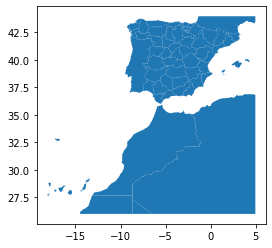

In [5]:
cp_spain_administr.plot()

Well, you actually only wanted Spain, but the shapefile seems to contain Algeria, Marocco, France.. as well. So let's filter, just as we already know it from pandas DataFrames.

<AxesSubplot:>

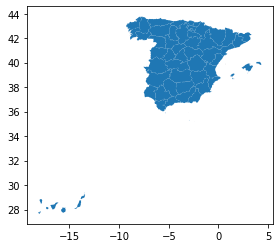

In [6]:
cp_spain_administr[cp_spain_administr["TIPO_0101"]=="03"].plot()

[46, 48, 96, 110]

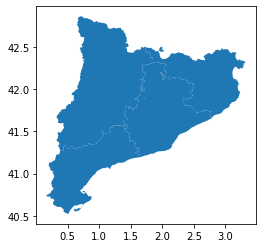

In [7]:
# or you only want Catalunya
catalunya_admin = cp_spain_administr[cp_spain_administr["CCAA"]=="Cataluña"]
catalunya_admin.plot()
list(catalunya_admin["ID"])

[96]

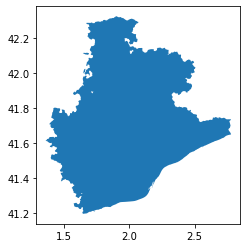

In [8]:
# or only Barcelona
barcelona_admin = cp_spain_administr[cp_spain_administr["ETIQUETA"]=="Barcelona"]
barcelona_admin.plot()
list(barcelona_admin["ID"])

And of course we would like to be able to stack the different maps for streets sierras and administration in one. To this end, we need to create a matplolib canvas first, and then tell each geopandas plot function that it is ought to plot on this canvas.

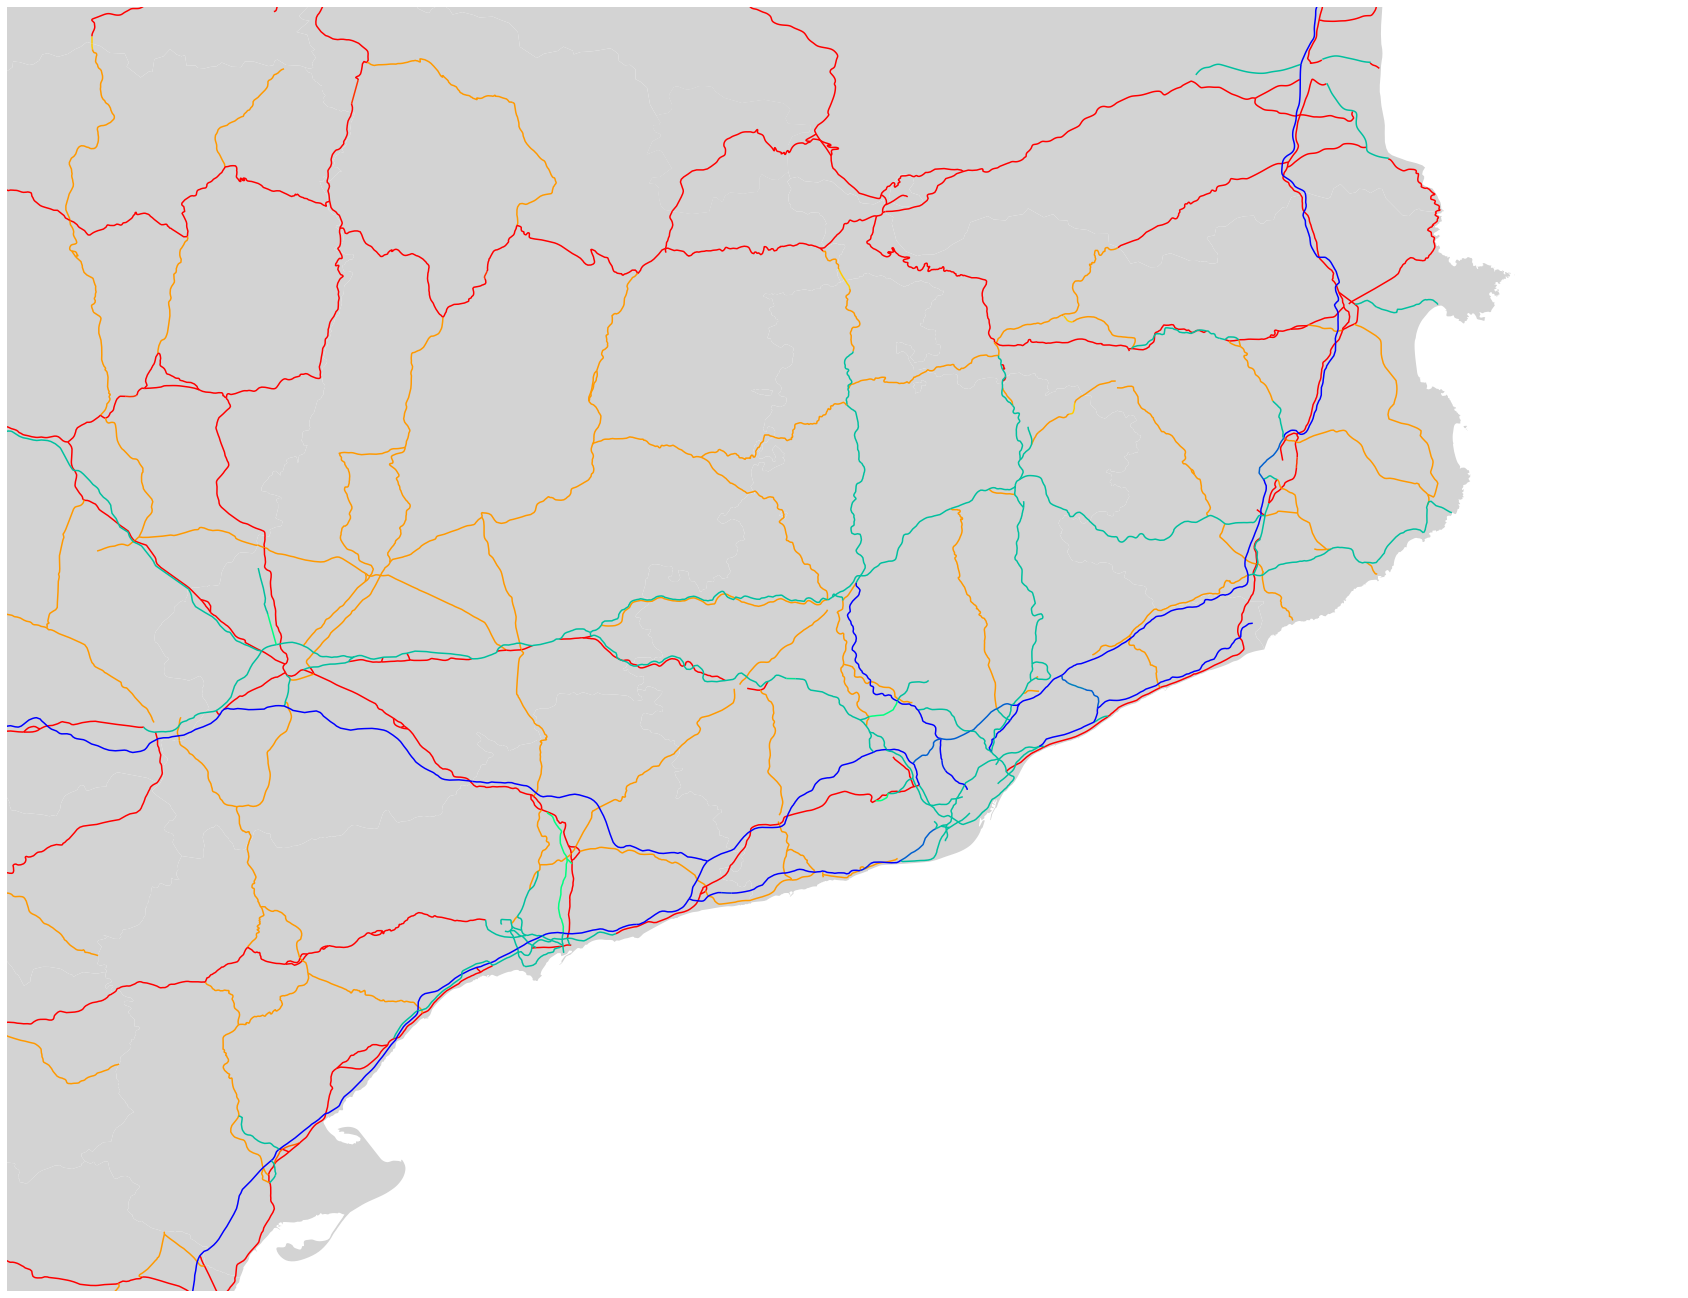

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (30, 30))
cp_spain_administr.plot(ax=ax, color = "lightgrey")
# use color codes to represent the street type
cp_spain_mainstreets.plot(ax=ax, column="TIPO_0602", cmap='autumn')
cp_spain_smallstreets.plot(ax=ax, column="TIPO_0601", cmap='winter')
ax.set_xlim([0, 3.7])
ax.set_ylim([40.5, 42.8])
ax.set_axis_off()


In [10]:
import pandas as pd
from sodapy import Socrata

# Meteorological stations
# Metadades estacions meteorològiques automàtiques
client = Socrata("analisi.transparenciacatalunya.cat", None)
stations = client.get("yqwd-vj5e", limit=2000)

# Convert to pandas DataFrame
stations_df = pd.DataFrame.from_records(stations)
stations_gdf = gpd.GeoDataFrame(stations_df, geometry=gpd.points_from_xy(stations_df.longitud, stations_df.latitud))
stations_gdf.crs = 'epsg:4326' # the database page indicates projection "WSG84", which corresponds to crs 'epsg:4326'
stations_gdf.pop('geocoded_column')
stations_gdf.head()

,codi_estacio,nom_estacio,codi_tipus,latitud,longitud,emplacament,altitud,codi_municipi,nom_municipi,codi_comarca,...,nom_provincia,codi_xarxa,nom_xarxa,codi_estat_ema,nom_estat_ema,data_inici,:@computed_region_bh64_c7uy,:@computed_region_wvic_k925,data_fi,geometry
0,X4,Barcelona - el Raval,A,41.3839,2.16775,Facultat de Geografia i Història. c. Montalegr...,33,332,Barcelona,13,...,Barcelona,1,XEMA,2,Operativa,2006-10-11T00:00:00.000,512,29,NaN,POINT (2.16775 41.38390)
1,YG,Tírvia,A,42.51881,1.24244,Heliport de Tírvia,954,634,Tírvia,26,...,Lleida,1,XEMA,2,Operativa,2018-01-11T00:00:00.000,335,2,NaN,POINT (1.24244 42.51881)
2,DD,Vilassar de Mar,A,41.51175,2.38674,"Soc.Civil d'Aigües ""La Mina Vella",44.5,513,Vilassar de Mar,21,...,Barcelona,1,XEMA,1,Desmantellada,1998-05-04T00:00:00.000,522,25,2015-01-16T00:00:00.000,POINT (2.38674 41.51175)
3,VY,Nulles,A,41.25095,1.29863,Cooperativa agrària,240,12,Nulles,1,...,Tarragona,1,XEMA,2,Operativa,2000-09-18T00:00:00.000,375,30,NaN,POINT (1.29863 41.25095)
4,YD,les Borges Blanques,A,41.51135,0.85617,Escola Agrària de les Borges Blanques,283,416,Les Borges Blanques,18,...,Lleida,1,XEMA,2,Operativa,2017-01-25T00:00:00.000,807,27,NaN,POINT (0.85617 41.51135)


<AxesSubplot:>

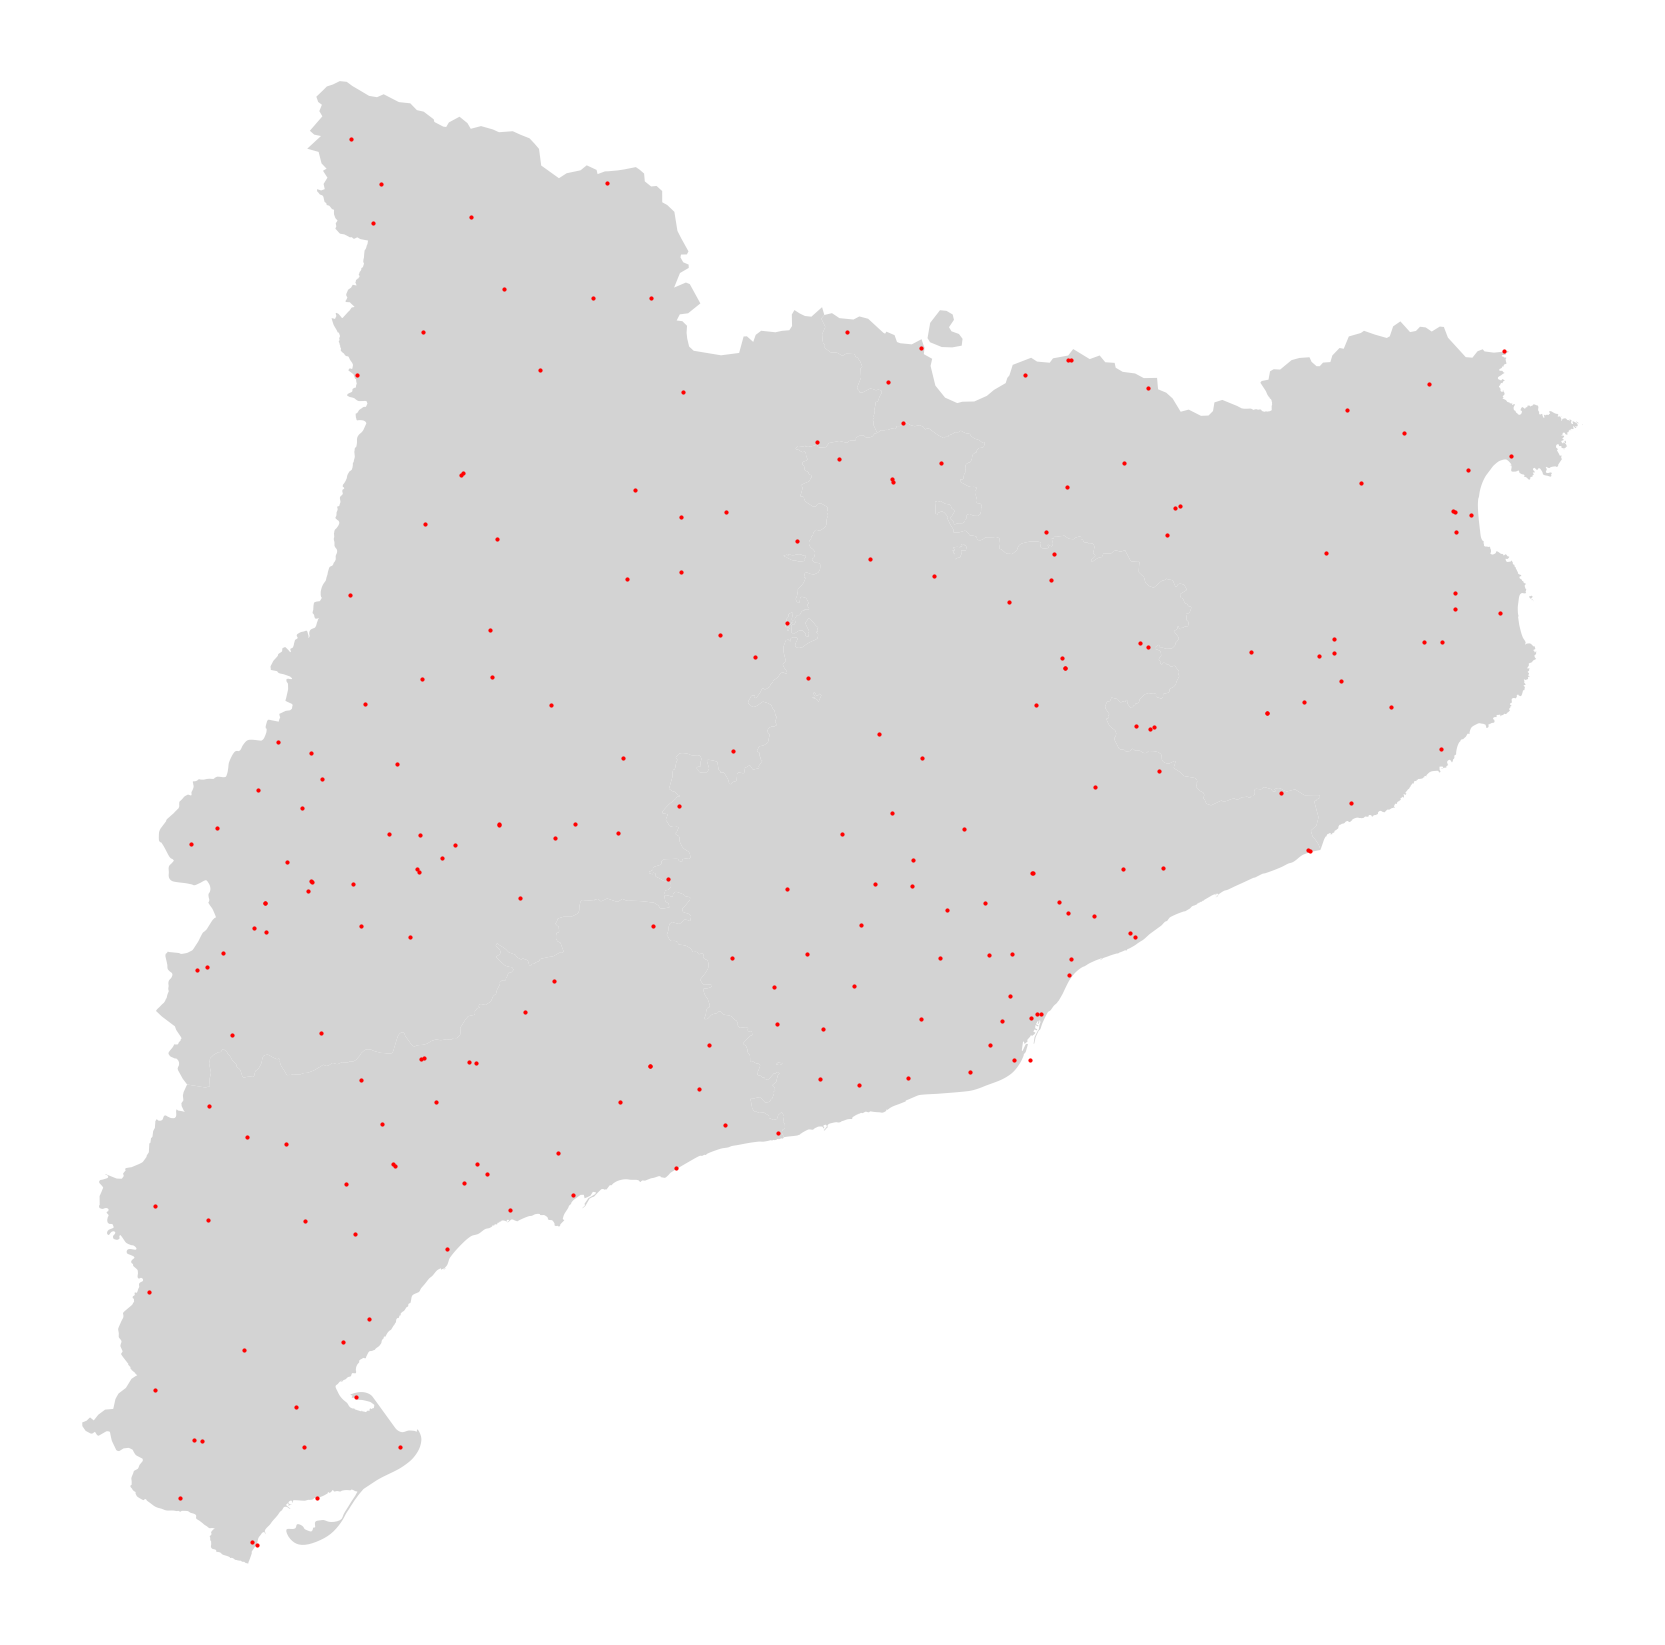

In [11]:
import matplotlib.pyplot as plt
# same code as above
fig, ax = plt.subplots(figsize = (30, 30))
catalunya_admin.plot(ax=ax, color = "lightgrey")
ax.set_axis_off()

# add stations
stations_gdf.plot(ax=ax, color = "red", markersize=10)

<AxesSubplot:>

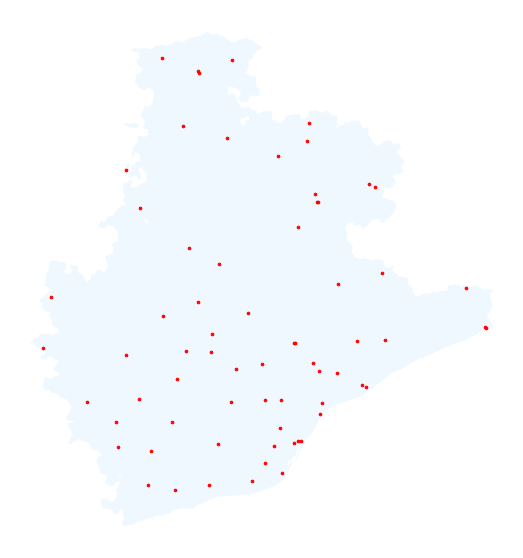

In [12]:
#This would be the easiest way but you might encounter package problems
stations_gdf = stations_gdf.to_crs("epsg:4258")
stations_in_barna = gpd.sjoin(stations_gdf, barcelona_admin, predicate='within')

import matplotlib.pyplot as plt
# same code as above
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_axis_off()
barcelona_admin.plot(ax=ax, color = "aliceblue")
# add stations
stations_in_barna.plot(ax=ax, color = "red", markersize=7)

We saw the very basic of how to load, manipulate and plot geospatial data in python. As you saw in former sessions, geopandas DataFrames can also be plotted with bokeh in one line.

In [13]:
import pandas_bokeh
stations_gdf.plot_bokeh()

Figure(id='1001', ...)

An other straightforward way is by using contextily, which you need to install first. pip install contextily.

Docs: https://contextily.readthedocs.io/en/latest/intro_guide.html

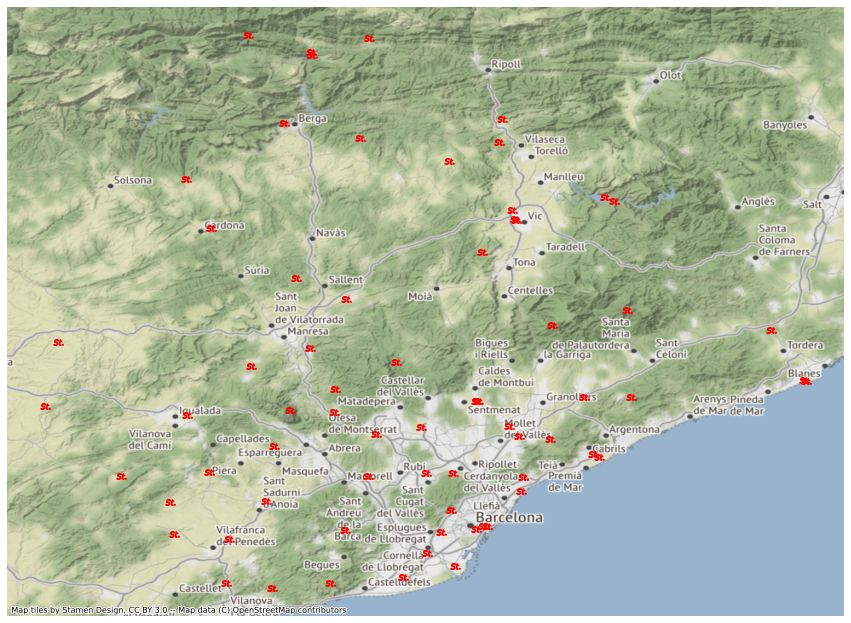

In [36]:
import contextily
fig, ax = plt.subplots(figsize = (15, 20))
stations_in_barna.plot(ax=ax, color = "red", marker="$St.$", markersize=90)
contextily.add_basemap(ax, crs=stations_in_barna.crs.to_string())
ax.set_axis_off()
